## 1.  Plotting Draft Policy on Simulated Data

In [108]:
using Revise
using Plots, CSV, DataFrames
includet("draftpolicy.jl")

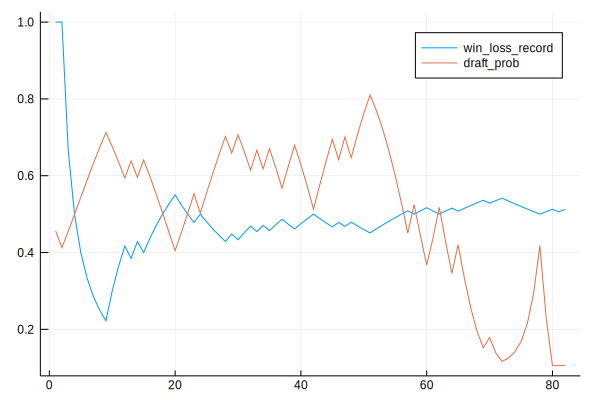

In [5]:
G=82
multiple=1
wins, record,draft_prob = simulate_draft_rule_N2(G,multiple) 
plot(1:G,[record,draft_prob[2:length(draft_prob)]],label=["win_loss_record","draft_prob"])

In [81]:
wprob = zeros(2,2).+0.5

win_prob_sim([4, 0],[1, 2],repeat([[1, 2]],3),wprob)

#size(zeros(length([2 0])))

2-element Array{Float64,1}:
 1.0
 0.0

Final standings in the season: 
[2.0, 5.0, 2.0]
Final Draft Probs: 
[0.571615, 0.0, 0.428385]


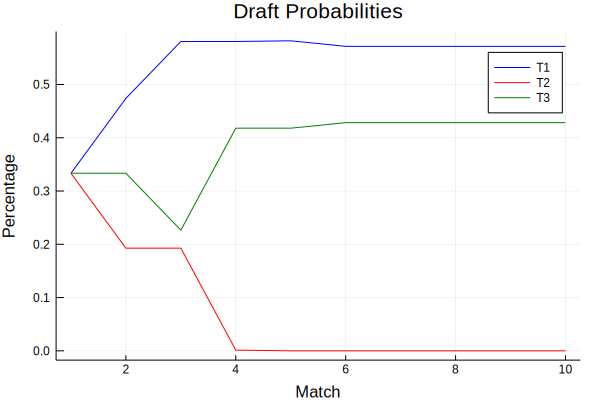

In [89]:
N=3
dps,wins,standings = simulate_draft_rule(N,3,repeat([1],N))
record = transpose(cumsum(wins,dims=2))
plot(1:size(dps,2),transpose(dps),xlabel="Match",ylabel="Percentage",title="Draft Probabilities",
    color=[:blue :red :green], label=["T1","T2","T3"]) 

In [139]:
plot(1:size(record,1),record,linestyle=:dash,color=[:blue :red :green], legend=:top, title="Wins", 
    label=["T1","T2","T3"])
#savefig("sim2_prod.pdf")
plot(1:(size(dps,2)),transpose(dps),xlabel="Match",ylabel="Percentage",title="Draft Probabilities",
    color=[:blue :red :green], legend=:top,label=["T1","T2","T3"]) 
#savefig("sim2_wins.pdf")


## 2. Plotting Draft Policy on Real Data

In [23]:
team_id = CSV.read("/Users/evanmunro/Documents/Github/draft-policy/data/cleaned/teams_1986.csv")
season = CSV.read("/Users/evanmunro/Documents/Github/draft-policy/data/cleaned/season_1986.csv")
team_id

,team,id
,String⍰,Int64⍰
1,Atlanta Hawks,1
2,Boston Celtics,2
3,Chicago Bulls,3
4,Cleveland Cavaliers,4
5,Dallas Mavericks,5
6,Denver Nuggets,6
7,Detroit Pistons,7
8,Golden State Warriors,8
9,Houston Rockets,9


In [115]:
matches = convert(Matrix, season[[:hID,:aID]])
wins = convert(Array, season[:win])
teams = convert(Array,team_id[:id])

#0.5 had good results 
ys,wins,end_wins,losses=calculate_draft_rule(teams,matches,wins,repeat([1],length(teams)),12,10,0.1)
# reduce at 69 when multiple=5

0.9310989010988929
0.35724857789269515
0.0898626373626421
0.8859544602456338
0.0898626373626421
reduce counting 208
0.9834308338720099
0.634626599870716
0.5863839689721961
0.7242890756302499
0.0898626373626421
reduce counting 209
1.0296593406593335
0.44986208791208676
0.7171522301228195
0.6301828054298626
0.0898626373626421
reduce counting 210
0.504745636716226
0.14176302521008405
0.8295298427063047
0.3538407886231414
0.0898626373626421
reduce counting 211
0.819701680672269
0.6300505709976281
0.7272362637362517
0.7130818896789468
0.0898626373626421
reduce counting 212
0.8014448394742502
0.6470031351001915
1.159294656324061
0.3112753393665157
0.0898626373626421
reduce counting 213
0.5101174315880193
0.12277840982546855
0.46711560008618536
0.7907631868131845
0.0898626373626421
reduce counting 214
0.2928329023917209
0.9208119263089816
0.34816160310278343
0.840688849385905
0.0898626373626421
reduce counting 215
0.6241660202542687
0.8018236479207046
0.47099816849817167
0.11426101055806924
0

reduce counting 296
1.1118999138116714
0.7498572074983813
0.8958276233570328
0.6174940206851952
0.0898626373626421
reduce counting 297
0.8065846800258598
0.18013561732385283
1.0152605042016756
0.31560187459599226
0.0898626373626421
reduce counting 298
0.6510221934927829
0.7636135962077113
1.1521517991812036
0.5510282266752838
0.0898626373626421
reduce counting 299
0.824978237448829
0.6472231631113965
1.2249212454212457
0.9185319543201869
0.0898626373626421
reduce counting 300
0.6378681318681344
0.18567291531997432
0.6842550096961899
0.14123736263736258
0.0898626373626421
reduce counting 301
1.049912087912084
0.9467242404654136
0.409489010989017
0.834544020685194
0.0898626373626421
reduce counting 302
0.47638052143933796
0.9125584464555015
0.9136579400991107
0.5531386662357232
0.0898626373626421
reduce counting 303
0.6877208405629398
0.8150011635423371
1.032642443212105
0.6000597285067849
0.0898626373626421
reduce counting 304
1.161704481792708
0.626946886446884
1.112049881491055
0.5008

0.6585903361344517
1.0298477698771737
0.9507491273432427
0.0898626373626421
reduce counting 386
0.3630384615384614
0.09178791208791204
0.5393422753716792
0.7828377504848072
0.0898626373626421
reduce counting 387
1.2524104718810487
0.57164489334195
0.42041919844860987
0.07485368455074333
0.0898626373626421
reduce counting 388
0.5927213962508104
0.8849890109890085
0.6364873949579775
0.7994087912087887
0.0898626373626421
reduce counting 389
0.573630252100843
0.17494379444085342
0.7264796380090497
0.20458335488041393
0.0898626373626421
reduce counting 390
0.3765274725274722
0.08773241758241751
0.7841698987287193
0.6487249515190667
0.0898626373626421
reduce counting 391
0.6460549450549391
0.888312637362635
0.7369615384615419
0.14399120879120877
0.0898626373626421
reduce counting 392
0.9489049773755653
0.6303355742296898
0.4765290885585083
0.788467442361557
0.0898626373626421
reduce counting 393
1.0374023747150698
0.9521509372979934
0.6862058993637871
0.3459785714285711
0.0898626373626421
re

0.0010109890109890468
reduce counting 474
1.1300258564964394
0.7272635746606309
0.4607142857142854
0.059787912087912023
0.0010109890109890468
reduce counting 475
0.2111687136393015
0.044337201034259824
0.8050785391079507
0.7575954427924996
0.0010109890109890468
reduce counting 476
1.1656648351648393
0.9565631868131843
0.5027857142857137
0.06165989010989007
0.0010109890109890468
reduce counting 477
0.6159670329670286
0.8963060439560409
1.2355659340659257
0.3708423076923073
0.0010109890109890468
reduce counting 478
0.12613736263736264
0.017382967032967035
0.6235071105365231
0.7951047834518402
0.0010109890109890468
reduce counting 479
1.0203054298642535
0.9616934065934036
1.0
0.9616934065934036
0.0010109890109890468
reduce counting 480
1.2823626373626258
0.5186576923076908
1.0259725274725195
0.24716263736263788
0.0010109890109890468
reduce counting 481
0.26085714285714234
0.06107692307692302
0.9116758241758205
0.5573648351648335
0.0010109890109890468
reduce counting 482
1.3053093083387182

0.7061773109243676
0.0
reduce counting 561
Stop counting 561
21
20
1.0410698125403972
0.6278553329023898
1.031897220426641
0.9663278603749164
0.0
reduce counting 562
Stop counting 562
23
2
0.1961208791208846
0.9058093406593383
1.05082417582417
0.9547631868131843
0.0
reduce counting 563
Stop counting 563
14
16
1.0972362637362667
0.9666368131868108
0.29326373626373575
0.036880219780219776
0.0
reduce counting 564
Stop counting 564
16
4
1.0
0.9661065934065912
1.0139615384615321
0.9651065934065912
0.0
reduce counting 565
Stop counting 565
12
9
0.362714285714284
0.931993956043953
0.04646153846153847
0.006703296703296703
0.0
reduce counting 566
Stop counting 566
1
10
0.14654945054945057
0.017424175824175825
1.0
0.9651747252747229
0.0
reduce counting 567
Stop counting 567
3
13
0.4185274725274721
0.05033626373626369
0.6029945054945061
0.08635274725274719
0.0
reduce counting 568
Stop counting 568
11
17
0.8851153846153825
0.7955811570782132
1.2330219780219744
0.8781723658694218
0.0
reduce countin

1.173357142857139
0.9371999999999977
0.0
reduce counting 648
Stop counting 648
18
7
1.0026499676793756
0.9680131868131843
0.7369104718810615
0.8215736263736242
0.0
reduce counting 649
Stop counting 649
13
20
0.5964999999999994
0.12842912087912078
1.4134175824175714
0.42674560439560366
0.0
reduce counting 650
Stop counting 650
17
22
0.0
0.001723076923076923
1.0
0.9673439560439534
0.0
reduce counting 651
Stop counting 651
10
2
0.12203846153846162
0.02994065934065935
0.0
0.0018
0.0
reduce counting 652
Stop counting 652
11
15
1.0016923076923048
0.9673648351648323
1.0
0.9673648351648323
0.0
reduce counting 653
Stop counting 653
12
16
0.0
0.0
0.8008241758241785
0.11155384615384609
0.0
reduce counting 654
Stop counting 654
8
19
1.0
0.9642291208791179
1.0906153846153857
0.9467565934065906
0.0
reduce counting 655
Stop counting 655
12
1
0.8413040293040197
0.8501023809523781
0.29212454212454175
0.02038534798534799
0.0
reduce counting 656
Stop counting 656
20
4
0.02846153846153846
0.00284615384615

0.0
reduce counting 740
Stop counting 740
2
5
0.017032967032967028
0.00436043956043956
1.0023076923076992
0.9680483516483487
0.0
reduce counting 741
Stop counting 741
17
7
0.0006593406593406606
0.0009230769230769232
0.0
0.0
0.0
reduce counting 742
Stop counting 742
21
8
1.0
0.9662439560439533
1.0059340659340668
0.9662439560439533
0.0
reduce counting 743
Stop counting 743
6
1
1.1559120879120832
0.812516483516481
0.0
0.0
0.0
reduce counting 744
Stop counting 744
14
3
1.0
0.9664065934065906
1.018989010989009
0.9664065934065906
0.0
reduce counting 745
Stop counting 745
2
9
1.0
0.9635824175824146
0.0
0.0
0.0
reduce counting 746
Stop counting 746
16
10
0.01657142857142857
0.001657142857142857
1.0
0.9650153846153819
0.0
reduce counting 747
Stop counting 747
11
12
0.08140659340659342
0.010986813186813188
0.0
0.0
0.0
reduce counting 748
Stop counting 748
4
15
1.7342417582417506
0.5824175824175807
0.9256043956043979
0.07639560439560432
0.0
reduce counting 749
Stop counting 749
20
19
1.7374999999

0.07140659340659342
0.0008571428571428571
0.0
reduce counting 839
Stop counting 839
21
17
1.0
0.969670329670327
1.21362637362637
0.9419780219780194
0.0
reduce counting 840
Stop counting 840
6
22
1.0190769230769339
0.9749692307692287
1.9286153846153749
0.4807054945054929
0.0
reduce counting 841
Stop counting 841
5
23
0.0
0.0
2.0385054945054892
0.5850813186813169
0.0
reduce counting 842
Stop counting 842
4
14
0.5514945054945048
0.08572747252747247
0.0
0.0
0.0
reduce counting 843
Stop counting 843
20
8
1.0
0.9736989010988985
0.0
0.0
0.0
reduce counting 844
Stop counting 844
5
15
0.7767692307692303
0.12222417582417575
0.0
0.0
0.0
reduce counting 845
Stop counting 845
19
21
2.051472527472522
0.8033890109890086
1.0
0.9746197802197776
0.0
reduce counting 846
Stop counting 846
23
2
1.1037582417582494
0.971301098901096
1.0
0.972301098901096
0.0
reduce counting 847
Stop counting 847
22
6
1.0274725274725285
0.9748505494505468
1.0
0.9748505494505468
0.0
reduce counting 848
Stop counting 848
9
7
1.

([0.0434783 0.0934783 … -0.145362 -0.145362; 0.0434783 0.0434783 … -0.913516 -0.913516; … ; 0.0434783 0.0434783 … 0.162561 0.162561; 0.0434783 -0.00652174 … 0.157588 0.157588], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 1.0 0.0 … 0.0 1.0], [50.0, 67.0, 30.0, 29.0, 44.0, 47.0, 46.0, 30.0, 51.0, 26.0  …  39.0, 23.0, 54.0, 32.0, 40.0, 37.0, 35.0, 31.0, 42.0, 39.0], [1.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [116]:
diff = cumsum(losses,dims=2)[:,560] - cumsum(wins,dims=2)[:,560]

df = DataFrame(team = copy(team_id[:team]),wins = copy(end_wins),score = copy(ys[:,943]),loss_wins = diff)
sort!(df, (:wins), rev=(true))

while(sum(df[:score].<0)>0)
    before = df[:score].<0
    df[:score][df[:score].>=0] .= df[:score][df[:score].>=0] .+ sum(df[:score][df[:score] .<0])./sum(df[:score].>=0)
    df[:score][before] .= 0 
end

df[:score][13:23] .= df[:score][13:23] .+ sum(df[:score][1:12])/length(df[:score][13:23])
df[:score][1:12] .= 0 
#df[:score][13:23] = df[:score][13:23]./sum(df[:score][12:23])
df[13:23,:]

,team,wins,score,loss_wins
,String⍰,Float64,Float64,Float64
1,Washington Bullets,39.0,0.0,1.0
2,Sacramento Kings,37.0,0.093897,11.0
3,San Antonio Spurs,35.0,0.0,-2.0
4,Los Angeles Clippers,32.0,0.223117,13.0
5,Phoenix Suns,32.0,0.0,9.0
6,Seattle SuperSonics,31.0,0.0,14.0
7,Chicago Bulls,30.0,0.0207459,16.0
8,Golden State Warriors,30.0,0.233576,22.0
9,Cleveland Cavaliers,29.0,0.0,12.0


In [100]:
Int(true)

1

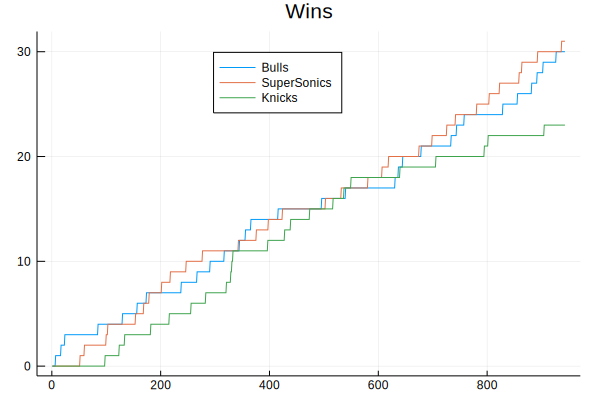

In [114]:
cwins = cumsum(wins,dims=2)

plot(1:size(cwins,2),transpose(cwins[[3,21,15],:]),label=["Bulls","SuperSonics","Knicks"],title="Wins",legend=:top)
#savefig("wins86.pdf")
#plot(1:size(cwins,2),transpose(ys[[3,21,15],2:944]),label=["Bulls","SuperSonics","Knicks"],legend=:top,title="Draft Prob")
#savefig("draft86.pdf")

In [178]:
cwins[[3,21,15],:]

3×943 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  30.0  30.0  30.0  30.0  30.0  30.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     31.0  31.0  31.0  31.0  31.0  31.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     23.0  23.0  23.0  23.0  23.0  23.0

In [176]:
size(cumsum(wins,dims=2),2)

943

In [205]:
N=3
G=3
teams = Array(1:N)
matches = repeat(collect(combinations(teams,2)),G)

9-element Array{Array{Int64,1},1}:
 [1, 2]
 [1, 3]
 [2, 3]
 [1, 2]
 [1, 3]
 [2, 3]
 [1, 2]
 [1, 3]
 [2, 3]

In [214]:
test = transpose(reshape(collect(Iterators.flatten(combinations(teams,2))),(2,3)))

3×2 LinearAlgebra.Transpose{Int64,Array{Int64,2}}:
 1  2
 1  3
 2  3

In [215]:
repeat(test,3)

9×2 Array{Int64,2}:
 1  2
 1  3
 2  3
 1  2
 1  3
 2  3
 1  2
 1  3
 2  3